Lab04 - Image Processing and Analysis
Full name: Bùi Thị Thanh Phương - ID Student: 20110280

In [ ]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
from pylab import imread
from skimage.color import rgb2gray
from google.colab import files
import os

In [ ]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()


In [ ]:
def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

Bài 01

Làm mờ ảnh với các kernel 3x3 và 5x5



In [ ]:
uploads = files.upload()

Saving graph1.jpg to graph1.jpg


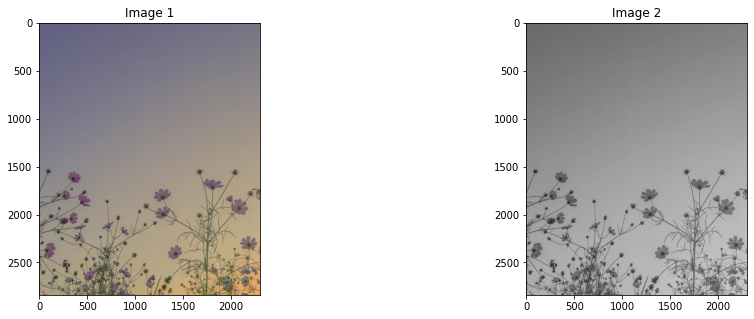

In [ ]:
# Read Image 
image_color = imread("graph1.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

Xuất giá trị đo mức độ mờ

In [ ]:

def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

Filtering Kernel 3x3:


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

Filtering Kernel 5x5:


array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

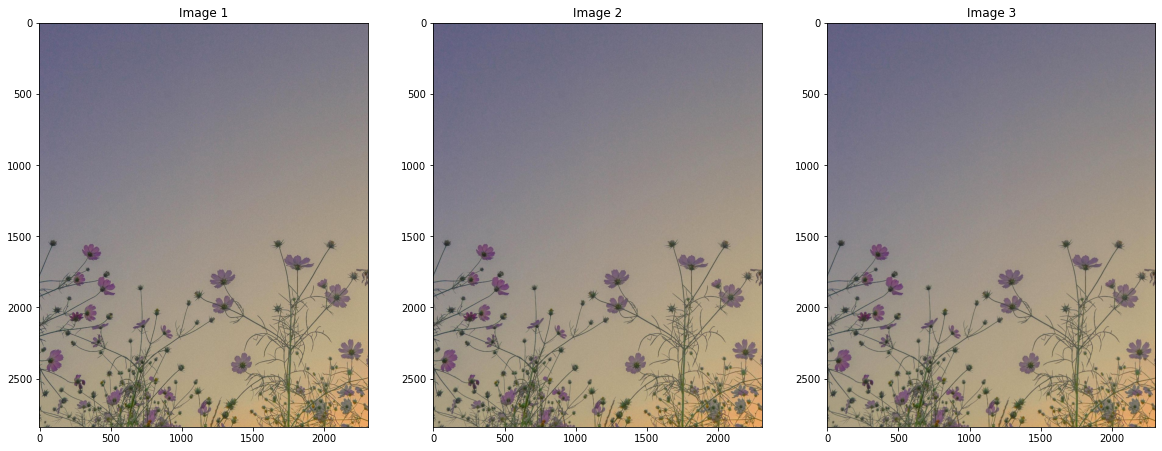

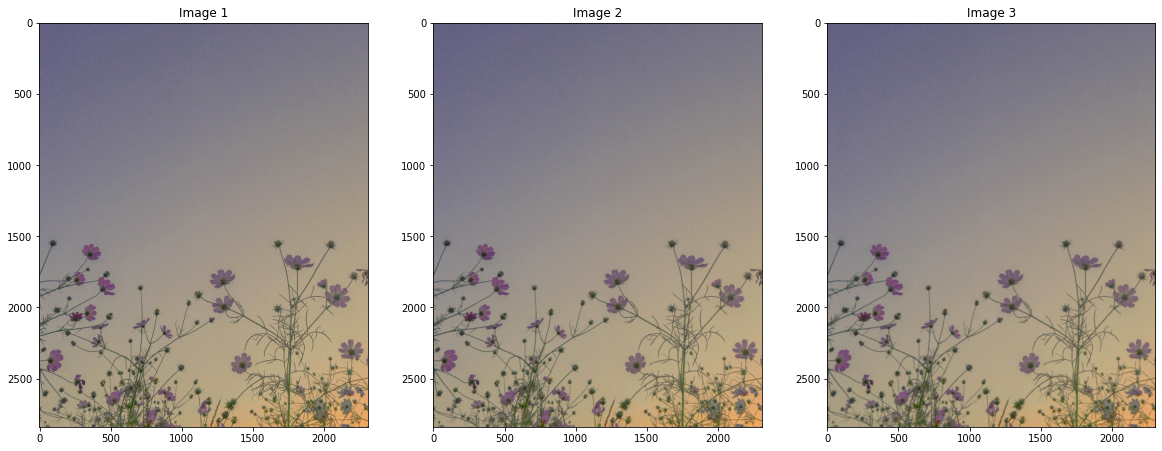

In [ ]:
kernel_3_3 = np.ones((3,3),np.float32)/9
kernel_5_5 = np.ones((5,5),np.float32)/25
print("Filtering Kernel 3x3:")
display(kernel_3_3)
print("Filtering Kernel 5x5:")
display(kernel_5_5)

image_filter_3_3_01 = cv2.filter2D(image_color,-1,kernel_3_3)
image_filter_3_3_02 = cv2.filter2D(image_filter_3_3_01,-1,kernel_3_3)

image_filter_5_5_01 = cv2.filter2D(image_color,-1,kernel_5_5)
image_filter_5_5_02 = cv2.filter2D(image_filter_5_5_01,-1,kernel_5_5)

ShowThreeImages(image_color, image_filter_3_3_01, image_filter_3_3_02)
ShowThreeImages(image_color, image_filter_5_5_01, image_filter_5_5_02)

In [ ]:
blur_mesurement = variance_of_laplacian(image_color)
blur_mesurement_3_3_01 = variance_of_laplacian(image_filter_3_3_01)
blur_mesurement_3_3_02 = variance_of_laplacian(image_filter_3_3_02)
print("Blur Measurement of image_color:", blur_mesurement)
print("Blur Measurement of image_filter_3_3_01:", blur_mesurement_3_3_01)
print("Blur Measurement of image_filter_3_3_02:", blur_mesurement_3_3_02)

Blur Measurement of image_color: 81.60721094845266
Blur Measurement of image_filter_3_3_01: 23.646258815017507
Blur Measurement of image_filter_3_3_02: 13.145443067430824


In [ ]:
blur_mesurement = variance_of_laplacian(image_color)
blur_mesurement_5_5_01 = variance_of_laplacian(image_filter_5_5_01)
blur_mesurement_5_5_02 = variance_of_laplacian(image_filter_5_5_02)
print("Blur Measurement of image_color:", blur_mesurement)
print("Blur Measurement of image_filter_5_5_01:", blur_mesurement_5_5_01)
print("Blur Measurement of image_filter_5_5_02:", blur_mesurement_5_5_02)

Blur Measurement of image_color: 81.60721094845266
Blur Measurement of image_filter_5_5_01: 8.276809190416603
Blur Measurement of image_filter_5_5_02: 3.7153372693487356


Viết dòng thông tin về giá trị mức độ mờ trên ảnh 

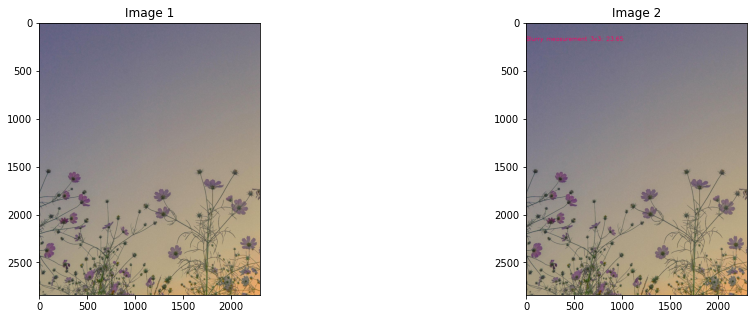

In [ ]:
text = "Blurry measurement 3x3"
fm = blur_mesurement_3_3_01
image_filter_3_3_01_text = image_filter_3_3_01.copy()
cv2.putText(image_filter_3_3_01_text, "{}: {:.2f}".format(text, fm), (00, 185), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 100), 3)
ShowTwoImages(image_filter_3_3_01, image_filter_3_3_01_text)

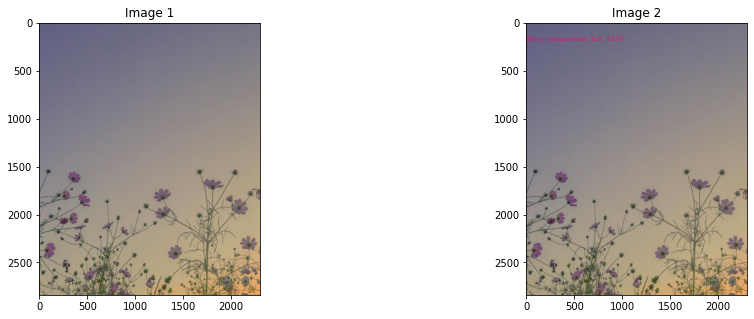

In [ ]:
text = "Blurry measurement 3x3"
fm = blur_mesurement_3_3_02
image_filter_3_3_02_text = image_filter_3_3_02.copy()
cv2.putText(image_filter_3_3_02_text, "{}: {:.2f}".format(text, fm), (00, 185), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 100), 3)
ShowTwoImages(image_filter_3_3_02, image_filter_3_3_02_text)

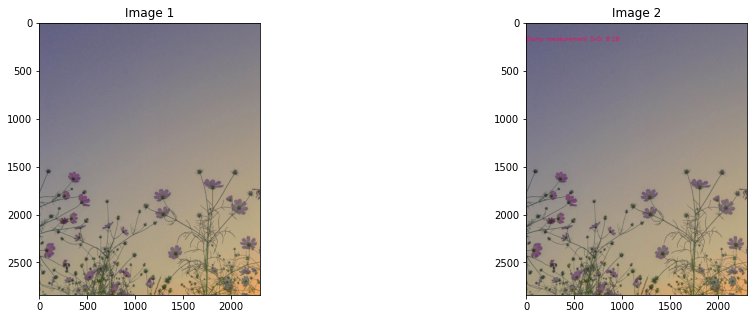

In [ ]:
text = "Blurry measurement 5x5"
fm = blur_mesurement_5_5_01
image_filter_5_5_01_text = image_filter_5_5_01.copy()
cv2.putText(image_filter_5_5_01_text, "{}: {:.2f}".format(text, fm), (00, 185), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 100), 3)
ShowTwoImages(image_filter_5_5_01, image_filter_5_5_01_text)

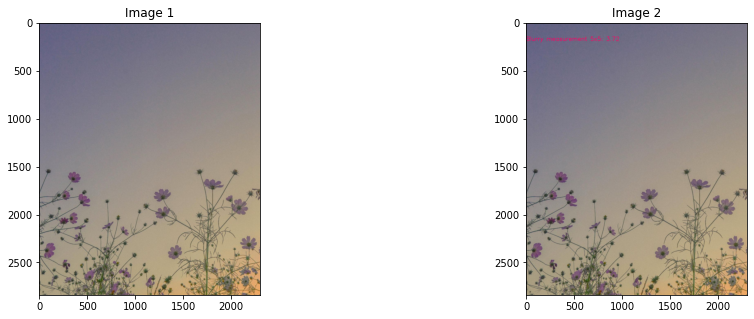

In [ ]:
text = "Blurry measurement 5x5"
fm = blur_mesurement_5_5_02
image_filter_5_5_02_text = image_filter_5_5_02.copy()
cv2.putText(image_filter_5_5_02_text, "{}: {:.2f}".format(text, fm), (00, 185), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 100), 3)
ShowTwoImages(image_filter_5_5_02, image_filter_5_5_02_text)

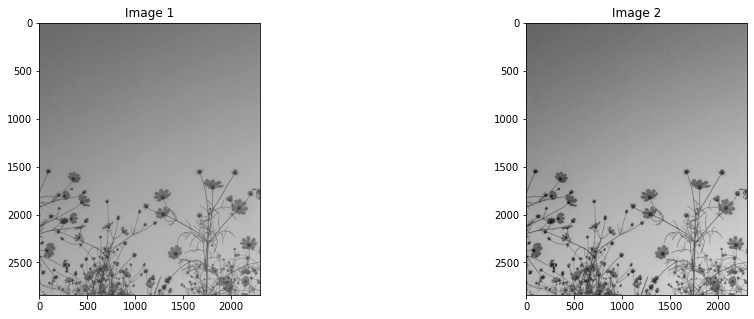

Blur Measurement of image_gray: 80.33233735719901
Blur Measurement of image_gray_filter: 23.572638545539522


In [ ]:
image_gray_filter = cv2.filter2D(image_gray,-1,kernel_3_3)
ShowTwoImages(image_gray, image_gray_filter)
print("Blur Measurement of image_gray:", variance_of_laplacian(image_gray))
print("Blur Measurement of image_gray_filter:", variance_of_laplacian(image_gray_filter))

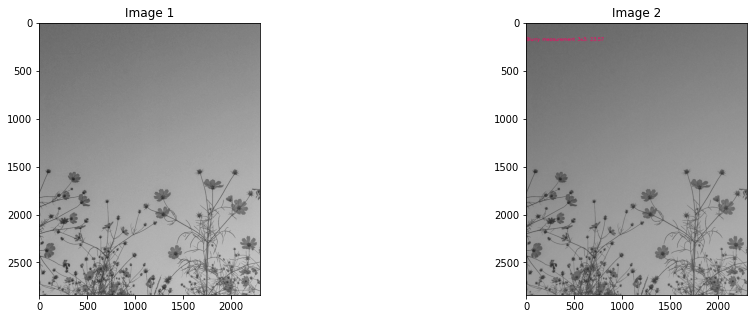

In [ ]:
image_gray_filter_color = cv2.cvtColor(image_gray_filter, cv2.COLOR_GRAY2RGB)

text = "Blurry measurement 3x3"
fm = variance_of_laplacian(image_gray_filter)
cv2.putText(image_gray_filter_color, "{}: {:.2f}".format(text, fm), (00, 185), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (255, 0, 100), 3)
ShowTwoImages(image_gray, image_gray_filter_color)

Bài 02

Làm rõ ảnh với các kernel 3x3 và 5x5

In [ ]:
uploads = files.upload()

Saving graph2.jpg to graph2.jpg


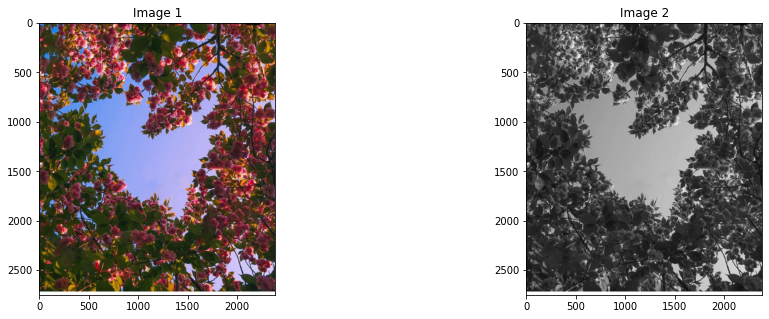

In [ ]:
# Read Image 
image_color = imread("graph2.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

In [ ]:
kernel_sharpen_01 = np.array([[-1,-1,-1], 
                              [-1, 9,-1], 
                              [-1,-1,-1]])

kernel_sharpen_02 = np.array(([0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]), dtype="int")

print("Filtering kernel_sharpen_01:")
display(kernel_sharpen_01)

print("Filtering kernel_sharpen_02:")
display(kernel_sharpen_02)

Filtering kernel_sharpen_01:


array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

Filtering kernel_sharpen_02:


array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [ ]:
#kernel 3x3
image_filter_3_3_01 = cv2.filter2D(image_color,-1,kernel_3_3)
image_filter_3_3_02 = cv2.filter2D(image_filter_3_3_01,-1,kernel_3_3)
image_filter_3_3_03 = cv2.filter2D(image_gray,-1,kernel_3_3)
#kernel 5x5
image_filter_5_5_01 = cv2.filter2D(image_color,-1,kernel_5_5)
image_filter_5_5_02 = cv2.filter2D(image_filter_5_5_01,-1,kernel_5_5)
image_filter_5_5_03 = cv2.filter2D(image_gray,-1,kernel_5_5)

ShowThreeImages(image_color, image_filter_3_3_01, image_filter_3_3_02)
ShowThreeImages(image_color, image_filter_5_5_01, image_filter_5_5_02)
ShowThreeImages(image_gray, image_filter_3_3_03, image_filter_3_3_03)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Sharpen_mesurement = variance_of_laplacian(image_color)
Sharpen_mesurement_3_3_01 = variance_of_laplacian(image_filter_3_3_01)
Sharpen_mesurement_3_3_02 = variance_of_laplacian(image_filter_3_3_02)
Sharpen_mesurement_3_3_03 = variance_of_laplacian(image_filter_3_3_03)
Sharpen_mesurement_5_5_01 = variance_of_laplacian(image_filter_5_5_01)
Sharpen_mesurement_5_5_02 = variance_of_laplacian(image_filter_5_5_02)
Sharpen_mesurement_5_5_03 = variance_of_laplacian(image_filter_5_5_03)
print("Sharpen Measurement of image_color:", blur_mesurement)
print("Sharpen Measurement of image_filter_3_3_01:", Sharpen_mesurement_3_3_01)
print("Sharpen Measurement of image_filter_3_3_02:", Sharpen_mesurement_3_3_02)
print("Sharpen Measurement of image_filter_3_3_03:", Sharpen_mesurement_3_3_03)
print("Sharpen Measurement of image_filter_5_5_01:", Sharpen_mesurement_5_5_01)
print("Sharpen Measurement of image_filter_5_5_02:", Sharpen_mesurement_5_5_02)
print("Sharpen Measurement of image_filter_5_5_03:", Sharpen_mesurement_5_5_03)

Sharpen Measurement of image_color: 81.60721094845266
Sharpen Measurement of image_filter_3_3_01: 27.43345490070739
Sharpen Measurement of image_filter_3_3_02: 17.250285931536197
Sharpen Measurement of image_filter_3_3_03: 26.455797266064067
Sharpen Measurement of image_filter_5_5_01: 12.222011500228627
Sharpen Measurement of image_filter_5_5_02: 6.28549469503179
Sharpen Measurement of image_filter_5_5_03: 11.669461720192208


Viết dòng thông tin về giá trị mức độ rõ trên ảnh

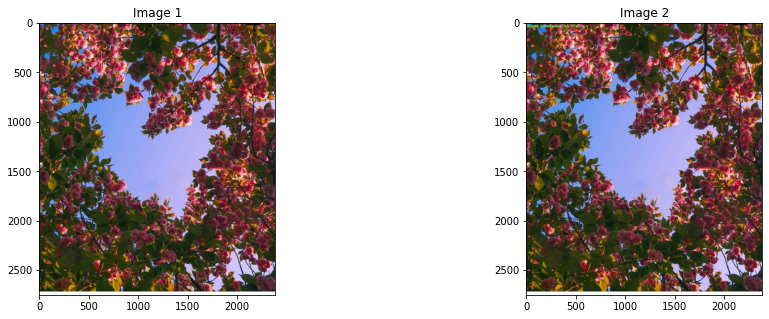

In [ ]:
text1 = "Sharpen measurement 3x3"
fm = Sharpen_mesurement_3_3_01
image_filter_3_3_01_text = image_filter_3_3_01.copy()
cv2.putText(image_filter_3_3_01_text, "{}: {:.2f}".format(text1, fm), (00, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 255, 100), 3)
ShowTwoImages(image_filter_3_3_01, image_filter_3_3_01_text)

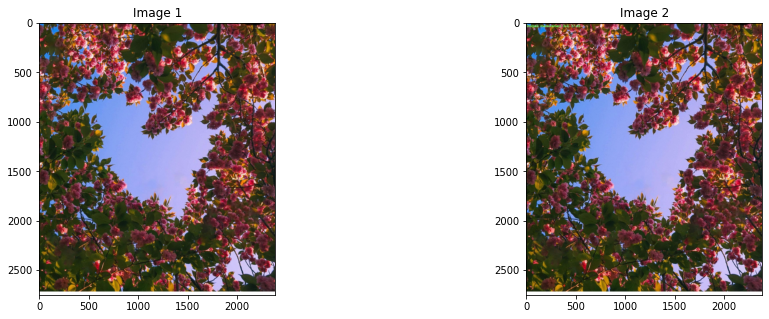

In [ ]:
text1 = "Sharpen measurement 3x3"
fm = Sharpen_mesurement_3_3_02
image_filter_3_3_02_text = image_filter_3_3_02.copy()
cv2.putText(image_filter_3_3_02_text, "{}: {:.2f}".format(text1, fm), (00, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 255, 100), 3)
ShowTwoImages(image_filter_3_3_02, image_filter_3_3_01_text)

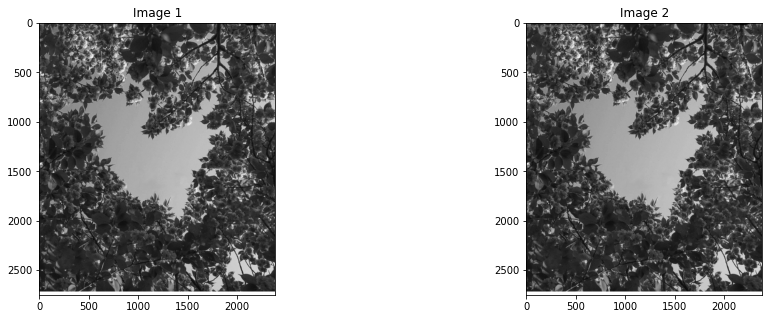

In [ ]:
text1 = "Sharpen measurement 3x3"
fm = Sharpen_mesurement_3_3_03
image_filter_3_3_03_text = image_filter_3_3_03.copy()
cv2.putText(image_filter_3_3_03_text, "{}: {:.2f}".format(text1, fm), (00, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 255, 100), 3)
ShowTwoImages(image_filter_3_3_03, image_filter_3_3_03_text)

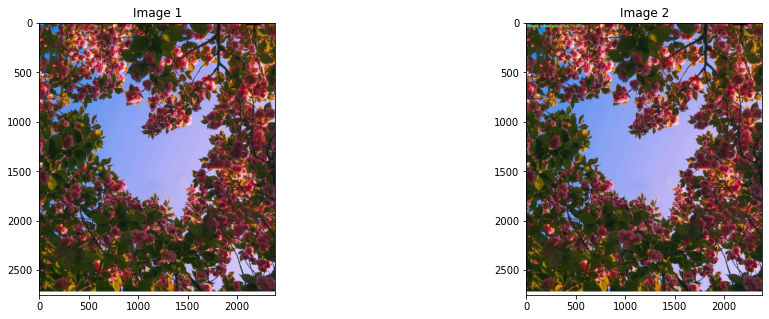

In [ ]:
text1 = "Sharpen measurement 5x5"
fm = Sharpen_mesurement_5_5_01
image_filter_5_5_01_text = image_filter_5_5_01.copy()
cv2.putText(image_filter_5_5_01_text, "{}: {:.2f}".format(text1, fm), (00, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 255, 100), 3)
ShowTwoImages(image_filter_5_5_01, image_filter_5_5_01_text)

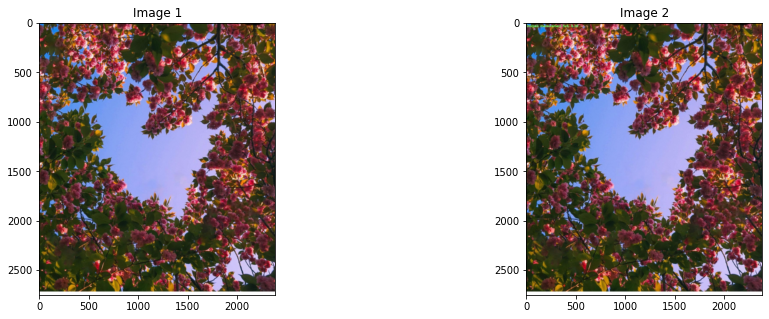

In [ ]:
text1 = "Sharpen measurement 5x5"
fm = Sharpen_mesurement_5_5_02
image_filter_5_5_02_text = image_filter_5_5_02.copy()
cv2.putText(image_filter_5_5_02_text, "{}: {:.2f}".format(text1, fm), (00, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 255, 100), 3)
ShowTwoImages(image_filter_5_5_02, image_filter_5_5_02_text)

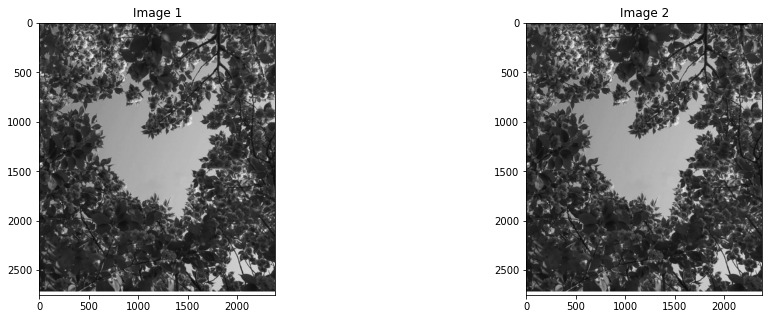

In [ ]:
text1 = "Sharpen measurement 5x5"
fm = Sharpen_mesurement_5_5_03
image_filter_5_5_03_text = image_filter_5_5_03.copy()
cv2.putText(image_filter_5_5_03_text, "{}: {:.2f}".format(text1, fm), (00, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 255, 100), 3)
ShowTwoImages(image_filter_5_5_03, image_filter_5_5_03_text)

Bai 3

In [ ]:
def load_images_from_folder(folder):
  images=[]
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
      return images

In [ ]:

folder ="C:\Users\DELL\Documents\xu lí ảnh\lap3\Image_Input"
image_path ="C:\Users\DELL\Documents\xu lí ảnh\lap3/Image_Output"
os.chdir(image_path)
images=load_images_from_folder(folder)
d=0
for i, img in enumerate(images):
  img_var = variance_of_laplacian(img)
  if img_var <= 7:
    text1 = "Blue Image"
    fm1 = img_var
    img_text = img.copy()
    cv2.putText(img_text, "{}: {:.2f}".format(text1, fm1), (00, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 250, 100), 3)
    filename = ""%d
    flag = cv2.imWrite(filename. img_text)
    if(flag):
      print("save successfully!!!")
      d+=1
    else:
      text1 ="Good Images"
      img_text = img.copy()
      cv2.putText(img_text, (00, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 250, 100), 3)
      filename = ""
      flag = cv2.imWrite(filename. img_text)
      if(flag):
        print("save successfully!!!")
        d+=1


Bai 4


In [ ]:
def max_rgb_filter(image):
    # split the image into its BGR components
    (B, G, R) = cv2.split(image)
    # find the maximum pixel intensity values for each
    # (x, y)-coordinate,, then set all pixel values less
    # than M to zero
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0
    # merge the channels back together and return the image
    return cv2.merge([B, G, R])

In [ ]:
uploads = files.upload()

Saving graph3.jpg to graph3.jpg


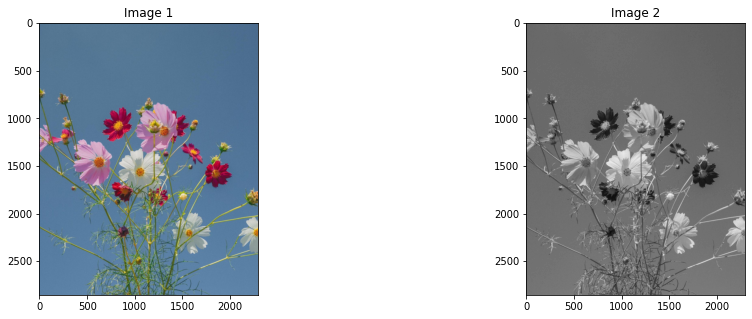

In [ ]:
# Read Image 
image_color = imread("graph3.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

Xuất ảnh từng điểm ảnh hiển thị giá trị RGBMax

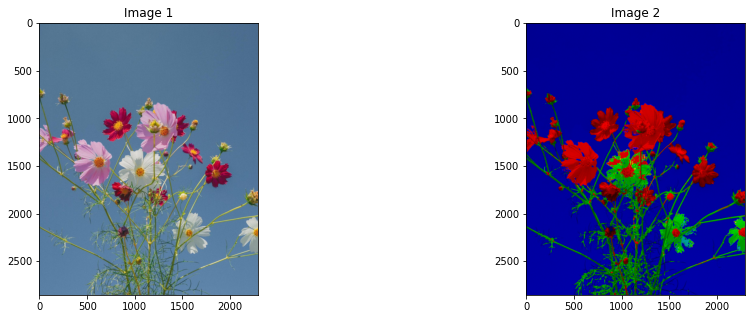

In [ ]:
image_color_rgbmax = max_rgb_filter(image_color)
ShowTwoImages(image_color, image_color_rgbmax)

Xuất các vị trí có giá trị R đạt max, G đạt max và B đạt max



In [ ]:
def SegmentColorImageByMask(IM, Mask):    
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

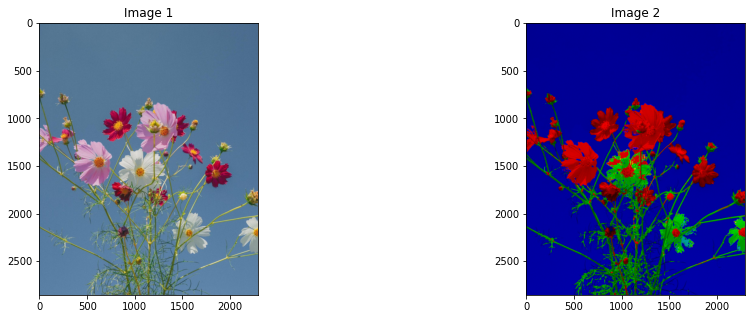

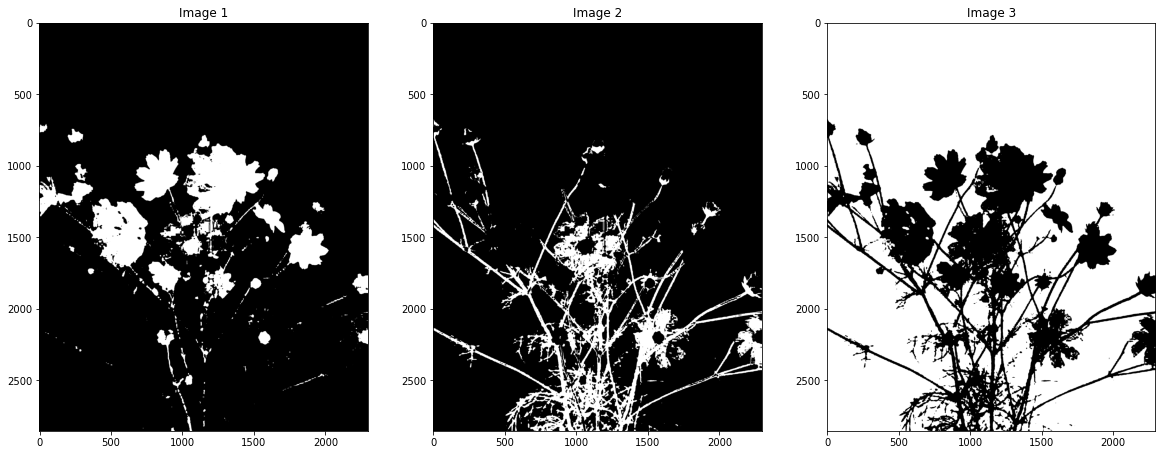

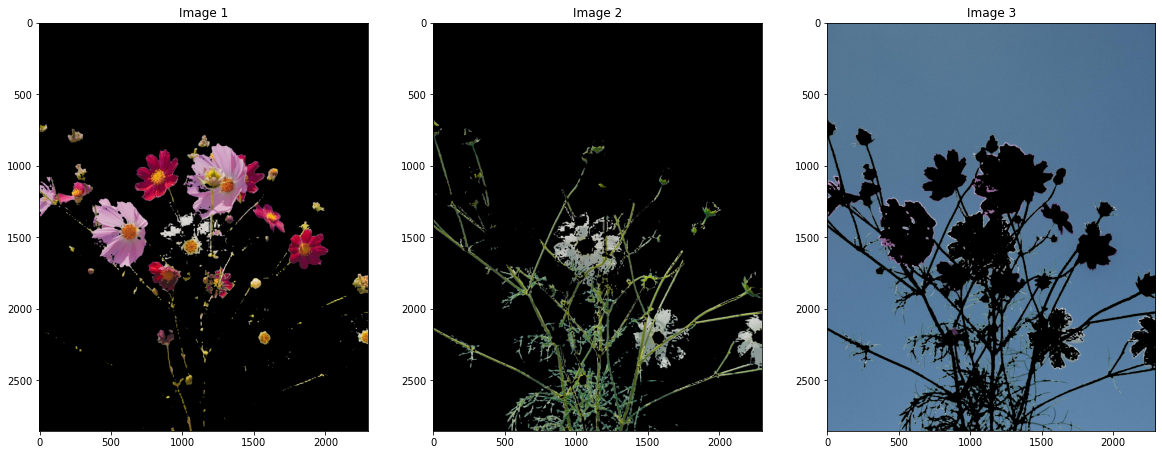

In [ ]:
image_maxR_mask = image_gray < 0
image_maxG_mask = image_gray < 0
image_maxB_mask = image_gray < 0

R = image_color_rgbmax[:,:,0]
G = image_color_rgbmax[:,:,1]
B = image_color_rgbmax[:,:,2]

image_maxR_mask[(G == 0) & (B == 0)] = 1
image_maxG_mask[(R == 0) & (B == 0)] = 1
image_maxB_mask[(G == 0) & (R == 0)] = 1

image_maxR = SegmentColorImageByMask(image_color, image_maxR_mask)
image_maxG = SegmentColorImageByMask(image_color, image_maxG_mask)
image_maxB = SegmentColorImageByMask(image_color, image_maxB_mask)

ShowTwoImages(image_color, image_color_rgbmax)
ShowThreeImages(image_maxR_mask, image_maxG_mask, image_maxB_mask)
ShowThreeImages(image_maxR, image_maxG, image_maxB)

Thưc hiện làm mờ ảnh rồi sau đó làm rõ ảnh

Filtering kernel_sharpen_01:


array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

Filtering kernel_sharpen_02:


array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

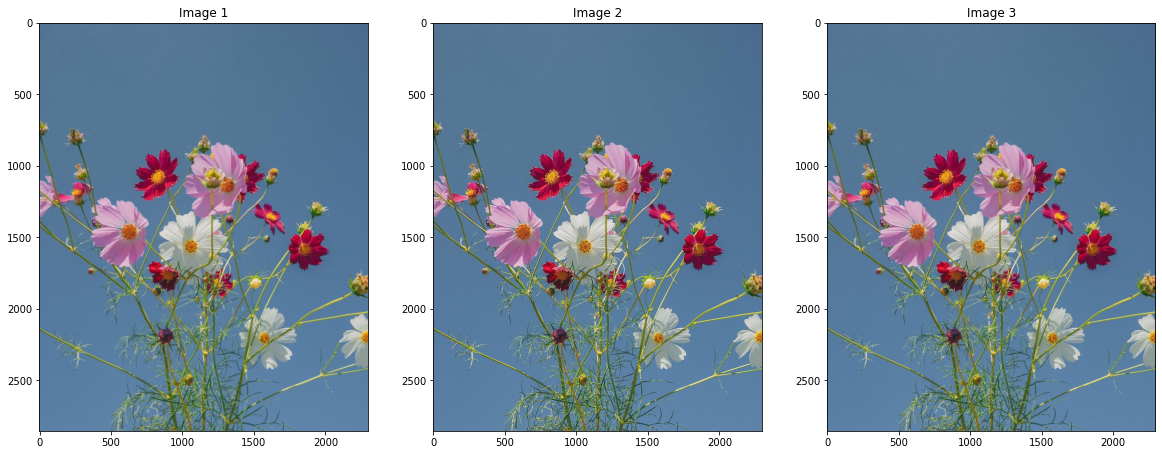

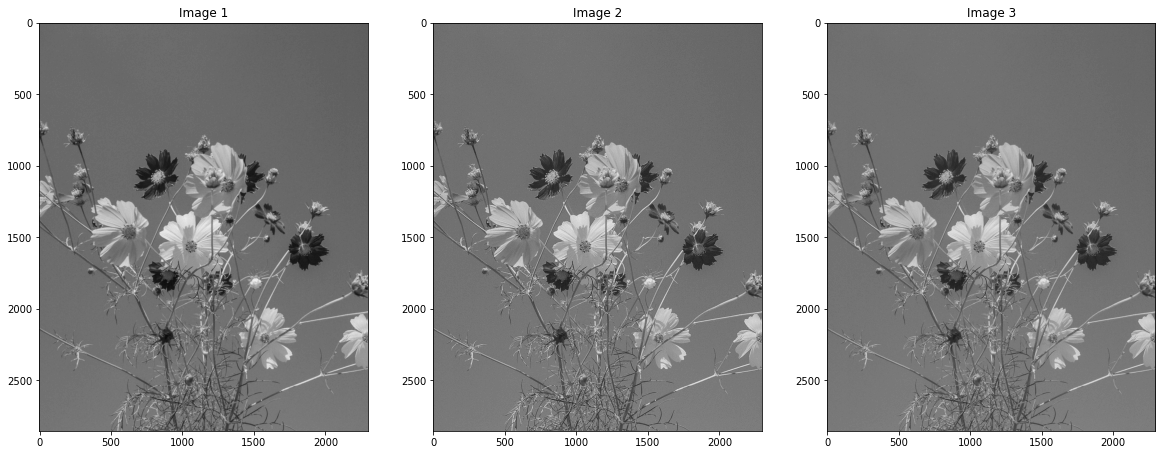

In [ ]:
kernel_sharpen_01 = np.array([[-1,-1,-1], 
                              [-1, 9,-1], 
                              [-1,-1,-1]])

kernel_sharpen_02 = np.array(([0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]), dtype="int")

print("Filtering kernel_sharpen_01:")
display(kernel_sharpen_01)

print("Filtering kernel_sharpen_02:")
display(kernel_sharpen_02)

image_color_sharpen_01 = cv2.filter2D(image_color, -1, kernel_sharpen_01)
image_gray_sharpen_01 = cv2.filter2D(image_gray, -1, kernel_sharpen_01)

image_color_sharpen_02 = cv2.filter2D(image_color, -1, kernel_sharpen_02)
image_gray_sharpen_02 = cv2.filter2D(image_gray, -1, kernel_sharpen_02)

ShowThreeImages(image_color, image_color_sharpen_01, image_color_sharpen_02)
ShowThreeImages(image_gray, image_gray_sharpen_01, image_gray_sharpen_02)

So sánh giá trị độ đo mờ có giống ảnh gốc không ?

In [ ]:
image_filter_color_sharpen_01 = cv2.filter2D(image_color, -1, kernel_sharpen_01)
blur_mesurement_sharpen_01 = variance_of_laplacian(image_filter_color_sharpen_01)
print("Blur Measurement of image_filter_color_sharpen_01:", blur_mesurement_sharpen_01)
image_filter_color_sharpen_02 = cv2.filter2D(image_color_sharpen_02, -1, kernel_sharpen_01)
blur_mesurement_sharpen_02 = variance_of_laplacian(image_filter_color_sharpen_02)
print("Blur Measurement of image_filter_color_sharpen_02:", blur_mesurement_sharpen_02)

Blur Measurement of image_filter_color_sharpen_01: 1635.094048104883
Blur Measurement of image_filter_color_sharpen_02: 27220.204075351663


Thưc hiện làm rõ ảnh rồi sau đó làm mờ ảnh



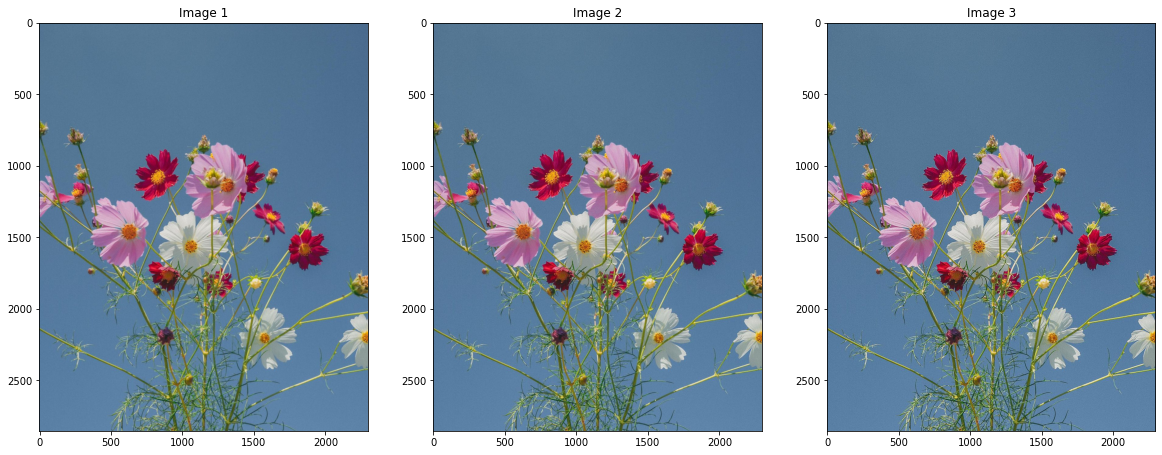

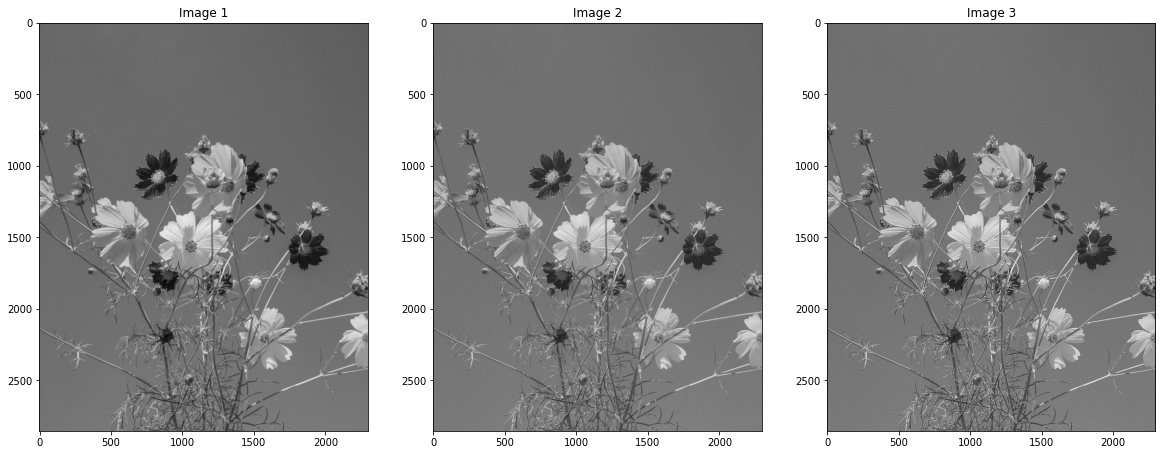

In [ ]:
image_color_sharpen_001 = cv2.filter2D(image_color, -1, kernel_sharpen_02)
image_gray_sharpen_001 = cv2.filter2D(image_gray, -1, kernel_sharpen_02)

image_color_sharpen_002 = cv2.filter2D(image_color, -1, kernel_sharpen_01)
image_gray_sharpen_002 = cv2.filter2D(image_gray, -1, kernel_sharpen_01)

ShowThreeImages(image_color, image_color_sharpen_001, image_color_sharpen_002)
ShowThreeImages(image_gray, image_gray_sharpen_001, image_gray_sharpen_002)

So sánh giá trị độ đo mờ có giống ảnh gốc không ?

In [ ]:
image_filter_color_sharpen_01 = cv2.filter2D(image_color, -1, kernel_sharpen_01)
blur_mesurement_sharpen_01 = variance_of_laplacian(image_filter_color_sharpen_01)
print("Blur Measurement of image_filter_color_sharpen_01:", blur_mesurement_sharpen_01)
image_filter_color_sharpen_001 = cv2.filter2D(image_color_sharpen_001, -1, kernel_sharpen_01)
blur_mesurement_sharpen_001 = variance_of_laplacian(image_filter_color_sharpen_001)
print("Blur Measurement of image_filter_color_sharpen_001:", blur_mesurement_sharpen_001)

Blur Measurement of image_filter_color_sharpen_01: 1635.094048104883
Blur Measurement of image_filter_color_sharpen_001: 27220.204075351663


Tìm cạnh và tạo ra các ảnh về cạnh sau : ảnh cạnh ngang, cạnh dọc và ảnh cạnh tổng

In [ ]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
# construct the Sobel x-axis kernel
kernel_sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
 
# construct the Sobel y-axis kernel
kernel_sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

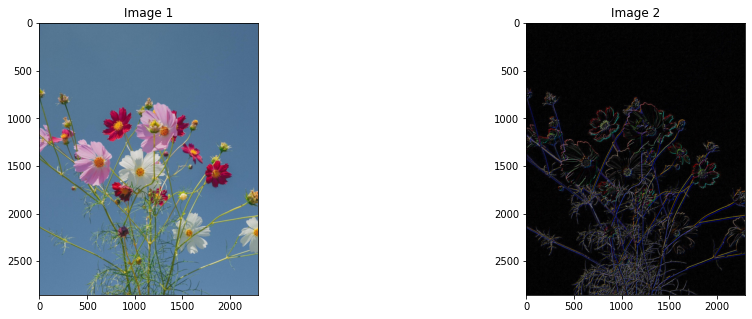

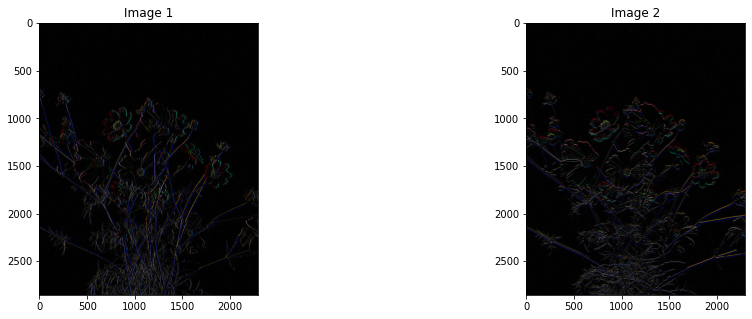

In [ ]:
image_color_edge_sobelX = cv2.filter2D(image_color, -1, kernel_sobelX)
image_color_edge_sobelY = cv2.filter2D(image_color, -1, kernel_sobelY)
image_color_edge = image_color_edge_sobelX + image_color_edge_sobelY

ShowTwoImages(image_color, image_color_edge)
ShowTwoImages(image_color_edge_sobelX, image_color_edge_sobelY)

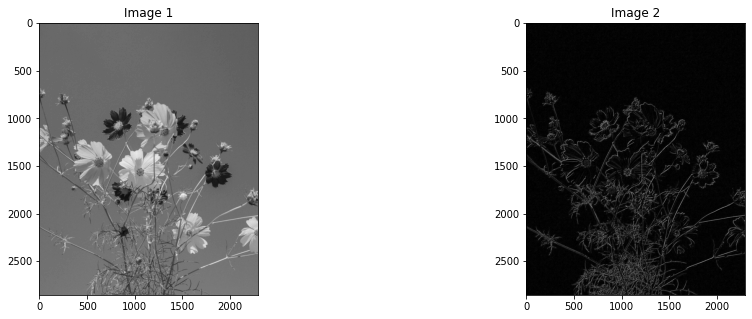

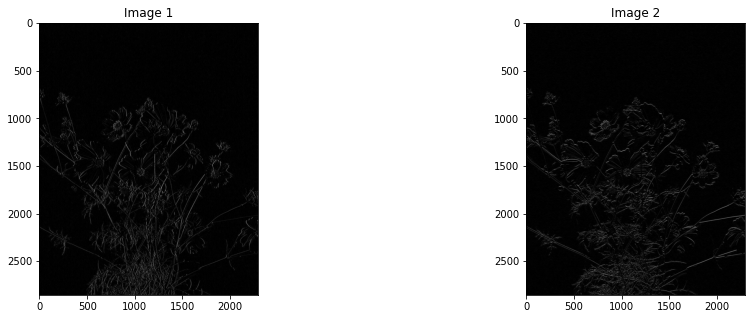

In [ ]:
image_gray_edge_sobelX = cv2.filter2D(image_gray, -1, kernel_sobelX)
image_gray_edge_sobelY = cv2.filter2D(image_gray, -1, kernel_sobelY)
image_gray_edge = image_gray_edge_sobelX + image_gray_edge_sobelY

ShowTwoImages(image_gray, image_gray_edge)
ShowTwoImages(image_gray_edge_sobelX, image_gray_edge_sobelY)